In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.python.platform import gfile
from tensorflow.python.ops import io_ops
import os
import tarfile
from tensorflow.python.ops import gen_audio_ops as audio_ops
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Download data set

Download from: https://storage.cloud.google.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz - approx 2.3 GB

And then run

```
tar -xzf data_speech_commands_v0.02.tar.gz -C speech_data
```

In [30]:
audio_file_name = '../speech_data/marvin/0a9f9af7_nohash_2.wav'
audio_data = io_ops.read_file(audio_file_name)
tf.audio.decode_wav(audio_data)

DecodeWav(audio=<tf.Tensor: shape=(16000, 1), dtype=float32, numpy=
array([[0.00088501],
       [0.0017395 ],
       [0.00189209],
       ...,
       [0.00018311],
       [0.00115967],
       [0.00167847]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=16000>)

In [31]:
IPython.display.Audio(audio_file_name)

In [32]:
# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

# Calculate and plot spectrogram for a wav audio file
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

array([[1.39788335e+02, 2.59312678e+02, 5.86949069e+02, ...,
        3.55571615e+00, 5.34208718e+02, 1.90429529e+01],
       [6.56127259e+01, 1.10689209e+02, 3.86688341e+02, ...,
        9.06598991e+02, 1.53524005e+03, 1.23275479e+02],
       [1.45947875e+01, 2.53336074e+01, 4.97712733e+00, ...,
        1.00751196e+03, 1.08190039e+03, 2.87486733e+02],
       ...,
       [4.11772762e-05, 2.57736860e-05, 7.96189712e-05, ...,
        3.67865046e-05, 3.92807689e-05, 1.56558856e-07],
       [1.04109464e-05, 1.04950190e-04, 1.10934554e-05, ...,
        4.83688369e-06, 4.00971255e-06, 1.76867224e-05],
       [9.69553318e-07, 7.69880087e-05, 1.34716387e-05, ...,
        1.95368347e-06, 1.43841412e-06, 8.62091487e-07]])

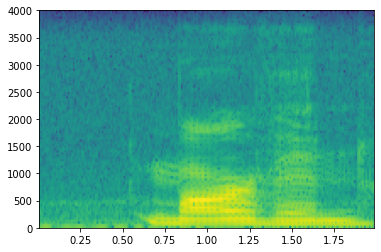

In [33]:
graph_spectrogram(audio_file_name)

In [34]:
get_wav_info(audio_file_name)

(16000, array([29, 57, 62, ...,  6, 38, 55], dtype=int16))